<a href="https://colab.research.google.com/github/ahmedtabsho/PytorchTutorial/blob/main/simple_NeuralNetwrok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [25]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) --> H2 (n) -->
  #output (3 classes of iris flowers)
  def __init__(self, in_features = 4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x



In [26]:
# pick a manual seed for randomization
torch.manual_seed(32)
# Create an instance of model
model = Model()

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df = pd.read_csv(url)
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [30]:
#change the target from string to numberic
df['species'] = df['species'].replace('setosa', 0)
df['species'] = df['species'].replace('versicolor', 1)
df['species'] = df['species'].replace('virginica', 2)

In [31]:
df['species'].unique()

array([0, 1, 2])

In [32]:
#Train Test split! Set X, y
X = df.drop('species', axis=1)
y = df['species']

In [33]:
# Convert thes to numpy arrays
X = X.values
y = y.values

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [35]:
# Convert X features to float  tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [36]:
# Covert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [37]:
# Set the criteerion of model to measure the error, how far off the predictions are from the real
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if erro doesn't go down after a bunch of itertion (epochs))
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [38]:
model.parameters()

<generator object Module.parameters at 0x7838ce28d310>

In [39]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  #print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss : {loss}')

  # Do some back propagation : take the error rate of forward propagation and feet it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss : 1.169895887374878
Epoch: 10 and loss : 0.9578844308853149
Epoch: 20 and loss : 0.7988812923431396
Epoch: 30 and loss : 0.634953498840332
Epoch: 40 and loss : 0.44043001532554626
Epoch: 50 and loss : 0.291716992855072
Epoch: 60 and loss : 0.17829042673110962
Epoch: 70 and loss : 0.11587586998939514
Epoch: 80 and loss : 0.08928147703409195
Epoch: 90 and loss : 0.07743765413761139


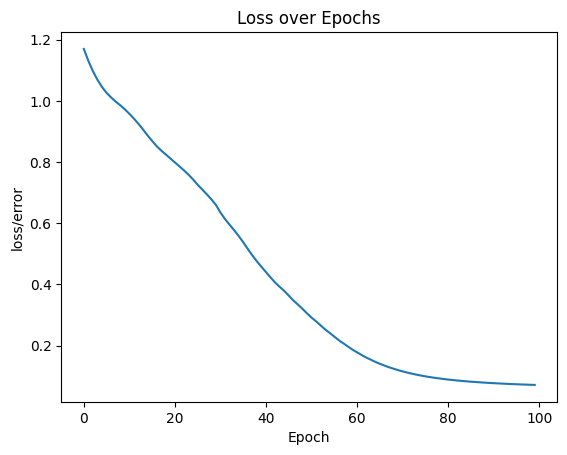

In [40]:
# Assuming 'epochs' and 'losses' are defined somewhere in your code
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')
plt.title('Loss over Epochs')  # You can add a title if you want
plt.show()

In [41]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad(): # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be
  loss = criterion(y_eval, y_test) # Find the loss or error

In [42]:
loss

tensor(0.0539)

In [43]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # will tell us what type of lfower calss our network think it is
    print(f'predicted: {y_val}, actual: {y_test[i]} \t {y_val.argmax().item()}')

    # correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'Accuracy: {correct}/{len(X_test)}')

predicted: tensor([-3.3580,  3.9452,  0.3616]), actual: 1 	 1
predicted: tensor([  7.5862,   1.1113, -11.3861]), actual: 0 	 0
predicted: tensor([  6.6288,   1.5092, -10.4603]), actual: 0 	 0
predicted: tensor([-3.3304,  4.2647,  0.0569]), actual: 1 	 1
predicted: tensor([-7.3705,  2.8135,  5.1481]), actual: 2 	 2
predicted: tensor([-7.3749,  3.9061,  4.2781]), actual: 2 	 2
predicted: tensor([  6.2304,   1.6527, -10.0543]), actual: 0 	 0
predicted: tensor([  6.8783,   1.4056, -10.7016]), actual: 0 	 0
predicted: tensor([-2.6728,  4.3138, -0.6444]), actual: 1 	 1
predicted: tensor([  7.2201,   1.3890, -11.1494]), actual: 0 	 0
predicted: tensor([-3.8269,  4.4110,  0.5165]), actual: 1 	 1
predicted: tensor([-8.6886,  1.9990,  6.9012]), actual: 2 	 2
predicted: tensor([-2.0605,  3.8275, -0.7672]), actual: 1 	 1
predicted: tensor([-1.0676,  4.3809, -2.2975]), actual: 1 	 1
predicted: tensor([-7.5000,  2.6230,  5.3318]), actual: 2 	 2
predicted: tensor([-8.6214,  1.5491,  7.1280]), actual:

In [46]:
new_iris = torch.tensor([[4.7, 3.2, 1.9, 0.2]])

In [47]:
with torch.no_grad():
  print(model.forward(new_iris))

tensor([[  6.2509,   1.6046, -10.0371]])


In [48]:
# Save our NN model
torch.save(model.state_dict(), 'iris.pt' )

In [49]:
# Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('iris.pt'))

<All keys matched successfully>

In [50]:
# Make sure it loaded correctly
with torch.no_grad():
  print(new_model.forward(new_iris))

tensor([[  6.2509,   1.6046, -10.0371]])


In [51]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)